Simulation NFBP pour 10 packaets. Contenu des boites :
Boite 0 : Rempli à 90 % avec 1 paquets. Taille du premier paquet : 0.9012353376749183
Boite 1 : Rempli à 73 % avec 1 paquets. Taille du premier paquet : 0.7398609903279183
Boite 2 : Rempli à 66 % avec 1 paquets. Taille du premier paquet : 0.6648347523159137
Boite 3 : Rempli à 95 % avec 1 paquets. Taille du premier paquet : 0.9586744885370793
Boite 4 : Rempli à 82 % avec 2 paquets. Taille du premier paquet : 0.418132315478732
Boite 5 : Rempli à 87 % avec 2 paquets. Taille du premier paquet : 0.6224721961409336
Boite 6 : Rempli à 46 % avec 2 paquets. Taille du premier paquet : 0.3438108698091238

Running 10000 NFBP simulations with 10 packages
Mean number of boxes : 5.8359 (variance 1.6849396839683968)
Mean H_0 : 0 (variance 0)
Mean H_1 : 0.4964 (variance 0.2500120412041204)
Mean H_2 : 1.1688 (variance 0.4729538553855386)
Mean H_3 : 1.832 (variance 0.6382398239823982)
Mean H_4 : 2.4946 (variance 0.8252533653365337)
Mean H_5 : 3.1688 

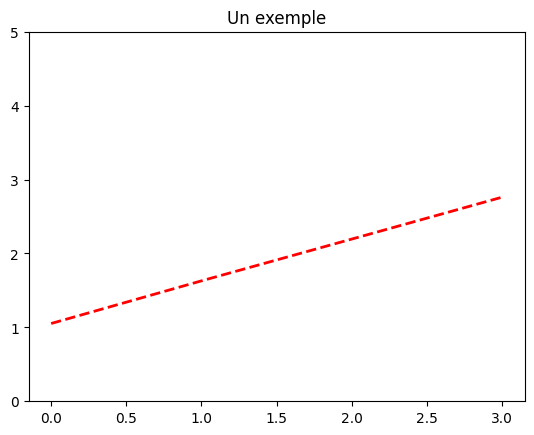

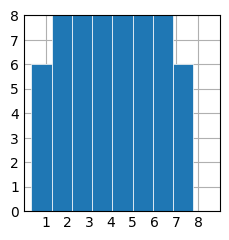

In [2]:
from random import random
from math import floor, sqrt
from statistics import mean, variance
import matplotlib.pyplot as plt
import numpy as np

# from matplotlib import pyplot

def simulate_NFBP(N):
    """
    Tries to simulate T_i, V_i and H_n for N boxes of random size.
    """
    i = 0  # Nombre de boites
    R = [0]  # Remplissage de la i-eme boite
    T = [0]  # Nombre de paquets de la i-eme boite
    V = [0]  # Taille du premier paquet de la i-eme boite
    H = []  # Rang de la boite contenant le n-ieme paquet
    for n in range(N):
        size = random()
        if R[i] + size >= 1:
            # Il y n'y a plus de la place dans la boite pour le paquet.
            # On passe à la boite suivante (qu'on initialise)
            i += 1
            R.append(0)
            T.append(0)
            V.append(0)
        R[i] += size
        T[i] += 1
        if V[i] == 0:
            # C'est le premier paquet de la boite
            V[i] = size
        H.append(i)

    return {
        "i": i,
        "R": R,
        "T": T,
        "V": V,
        "H": H
    }


def stats_NFBP(R, N):
    """
    Runs R runs of NFBP (for N packages) and studies distribution, variance, mean...
    """
    print("Running {} NFBP simulations with {} packages".format(R, N))
    I = []
    H = [[] for _ in range(N)]  # List of empty lists

    for i in range(R):
        sim = simulate_NFBP(N)
        I.append(sim["i"])
        for n in range(N):
            H[n].append(sim["H"][n])

    print("Mean number of boxes : {} (variance {})".format(mean(I), variance(I)))

    for n in range(N):
        print("Mean H_{} : {} (variance {})".format(n, mean(H[n]), variance(H[n])))


def simulate_NFDBP(N):
    """
    Tries to simulate T_i, V_i and H_n for N boxes of random size.
    """
    i = 0  # Nombre de boites
    R = [0]  # Remplissage de la i-eme boite
    T = [0]  # Nombre de paquets de la i-eme boite
    V = [0]  # Taille du premier paquet de la i-eme boite
    H = []  # Rang de la boite contenant le n-ieme paquet
    for n in range(N):
        size = random()
        R[i] += size
        T[i] += 1
        if R[i] + size >= 1:
            # Il y n'y a plus de la place dans la boite pour le paquet.
            # On passe à la boite suivante (qu'on initialise)
            i += 1
            R.append(0)
            T.append(0)
            V.append(0)

        if V[i] == 0:
            # C'est le premier paquet de la boite
            V[i] = size
        H.append(i)

    return {
        "i": i,
        "R": R,
        "T": T,
        "V": V,
        "H": H
    }


def stats_NFDBP(R, N):
    """
    Runs R runs of NFDBP (for N packages) and studies distribution, variance, mean...
    """
    print("Running {} NFDBP simulations with {} packages".format(R, N))
    I = []
    H = [[] for _ in range(N)]  # List of empty lists
    Tmean=[]
    Tn=[]
    Tn.append(0)
    Tn.append(0)
    Tn.append(0)
    Tn.append(0)
    Tn.append(0)
    Tn.append(0)
    Tn.append(0)





    for i in range(R):
        sim = simulate_NFDBP(N)
        I.append(sim["i"])
        for n in range(N):
            H[n].append(sim["H"][n])


        Tmean.append(sim["T"])
        
      #  for k in range(len(sim["T"])+1):

       #     if Tmean[i][k] == 1:
        #        Tn[k]+=Tmean[i][k]
         #   elif Tmean[i][k] == 2:
          #      Tn[k]+=Tmean[i][k]
           # elif Tmean[i][k] == 3:
             #   Tn[k] +=Tmean[i][k]
    print("Mean number of boxes : {} (variance {})".format(mean(I), variance(I)))

    for n in range(N):
        print("Mean H_{} : {} (variance {})".format(n, mean(H[n]), variance(H[n])))
    
    for i in range(int(mean(I))+1):
        print(Tmean[7])
        for k in range(len(Tmean[0])-1):
                Tn[k]+=Tmean[i][k]
    for i in range(len(Tn)):
        Tn[i]=Tn[i]/mean(I)
        print("Mean T_{} : {}".format(i, Tn[i]))
        
    plt.plot((mean(H[1]),mean(H[2]),mean(H[3]),mean(H[4])), color = 'red', linestyle = 'dashed', linewidth = 2,markerfacecolor = 'blue', markersize = 5)
    plt.ylim(0, 5)
    plt.title('Un exemple')
       # print("Mean T_{} : {} (variance {})".format(k, mean(Tmean[k]), variance(Tmean[k])))
            
N = 10 ** 1
sim = simulate_NFBP(N)

print("Simulation NFBP pour {} packaets. Contenu des boites :".format(N))
for j in range(sim["i"] + 1):
    remplissage = floor(sim["R"][j] * 100)
    print("Boite {} : Rempli à {} % avec {} paquets. Taille du premier paquet : {}".format(j, remplissage, sim["T"][j],
                                                                                           sim["V"][j]))

print()
stats_NFBP(10 ** 4, 10)

N = 10 ** 1
sim = simulate_NFDBP(N)
print("Simulation NFDBP pour {} packaets. Contenu des boites :".format(N))
for j in range(sim["i"] + 1):
    remplissage = floor(sim["R"][j] * 100)
    print("Boite {} : Rempli à {} % avec {} paquets. Taille du premier paquet : {}".format(j, remplissage,
                                                                                               sim["T"][j],
                                                                                               sim["V"][j]))

print()
stats_NFDBP(10 ** 4, 10)


#Debut de l'illustration

plt.style.use('_mpl-gallery')

# make data
np.random.seed(1)
x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 9), xticks=np.arange(1, 9),
       ylim=(0, 8), yticks=np.linspace(0, 8, 9))

plt.show()




